<a href="https://colab.research.google.com/github/YashSarda10/Mini-Project-Digit-Recognizer/blob/master/DigitClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

(60000, 28, 28)
(10000, 28, 28)
5


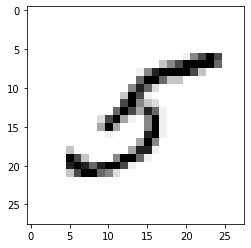

uint8


In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train[35])
plt.imshow(x_train[35], cmap='Greys')
plt.show()
print(x_train[35].dtype)

In [4]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512,activation ='relu'))                        
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(512,activation ='relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(512,activation ='softmax'))

In [5]:
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')

In [6]:
history = model.fit(x_train, y_train,batch_size=128, epochs=25,verbose=2,validation_data=(x_test, y_test))

Epoch 1/25
469/469 - 10s - loss: 2.4610 - accuracy: 0.8682 - val_loss: 0.2788 - val_accuracy: 0.9467
Epoch 2/25
469/469 - 9s - loss: 0.3616 - accuracy: 0.9279 - val_loss: 0.1516 - val_accuracy: 0.9582
Epoch 3/25
469/469 - 9s - loss: 0.2196 - accuracy: 0.9467 - val_loss: 0.1412 - val_accuracy: 0.9621
Epoch 4/25
469/469 - 9s - loss: 0.1679 - accuracy: 0.9548 - val_loss: 0.1319 - val_accuracy: 0.9648
Epoch 5/25
469/469 - 9s - loss: 0.1477 - accuracy: 0.9591 - val_loss: 0.1207 - val_accuracy: 0.9656
Epoch 6/25
469/469 - 9s - loss: 0.1415 - accuracy: 0.9616 - val_loss: 0.1181 - val_accuracy: 0.9684
Epoch 7/25
469/469 - 9s - loss: 0.1265 - accuracy: 0.9654 - val_loss: 0.1125 - val_accuracy: 0.9709
Epoch 8/25
469/469 - 9s - loss: 0.1433 - accuracy: 0.9615 - val_loss: 0.1459 - val_accuracy: 0.9625
Epoch 9/25
469/469 - 10s - loss: 0.1423 - accuracy: 0.9631 - val_loss: 0.1265 - val_accuracy: 0.9670
Epoch 10/25
469/469 - 9s - loss: 0.1400 - accuracy: 0.9631 - val_loss: 0.1305 - val_accuracy: 0.96

In [14]:
y_pred = model.predict(x_test)
predictions = [ np.argmax(x) for x in y_pred]
print(predictions[0:10])

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]


In [8]:
test = model.predict(np.reshape(x_test[0],(1,28,28)))

In [9]:
np.argmax(model.predict(x_test), axis=-1)

array([7, 2, 1, ..., 4, 5, 6])

In [10]:
# Evaluation
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(predictions,y_test)

0.9758

In [11]:
confusion_matrix(predictions,y_test)

array([[ 967,    0,    0,    0,    0,    2,    6,    2,    2,    1],
       [   1, 1121,    2,    0,    1,    0,    3,    4,    4,    4],
       [   1,    0, 1010,    2,    5,    0,    0,    4,    1,    0],
       [   1,    3,    1,  992,    0,   18,    1,    0,    3,    5],
       [   0,    0,    0,    0,  936,    0,    1,    0,    1,    4],
       [   2,    2,    1,    4,    0,  854,    2,    0,    3,    4],
       [   4,    1,    0,    0,    4,    8,  941,    0,    4,    0],
       [   1,    2,   12,    6,    0,    2,    0, 1011,    6,    7],
       [   2,    6,    6,    5,    3,    6,    4,    1,  944,    2],
       [   1,    0,    0,    1,   33,    2,    0,    6,    6,  982]])

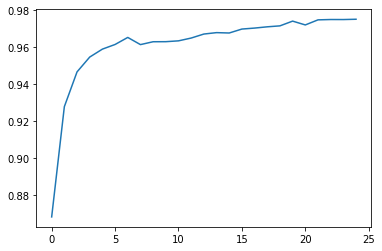

In [12]:
plt.plot(history.history['accuracy'])

In [13]:
model.save('keras_model.h5')